In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np



In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

reshaped into one dimensional array!

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane", "automobile","bird", "cat","deer","dog","frog","horse","ship","truck"]
classes[9]

'truck'

In [8]:
y_train[:6]

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [9]:
def plot_sample(X,y,index):
    plt.figure(figsize=(12,6))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    plt.show()

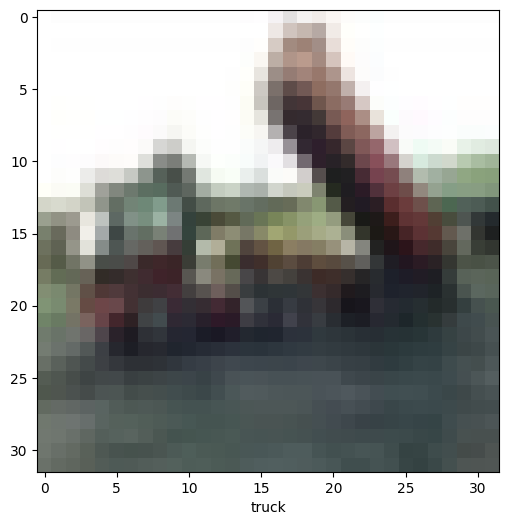

In [10]:
plot_sample(X_train,y_train,2)

normalizing the values

In [11]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [12]:
X_train = X_train/255
X_test = X_test/255

Modeling building

Using Artificial Network

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

ann.compile(optimizer='Adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])



In [16]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12230010 (46.65 MB)
Trainable params: 12230010 (46.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Using CNN 

In [18]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation = 'relu', input_shape = (32,32,3  )),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10, activation='softmax')
])


In [20]:
cnn.compile(optimizer='Adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [21]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1152)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               